# Pymaceuticals Inc.
---

### Analysis

- The pie charts illustrating male vs female in the tumor data from the study suggests that roughly a fair and balanced count of both sex were used for the study. With 51% being male, and 49% being female. 
- The correlation coefficient of 0.84 in the last graph indicates a strong positive linear relationship between mouse weight and average tumor volume in the Capomulin treatment regimen. It suggests that as the mouse weight increases, there is a tendency for the average tumor volume to also increase. 
- By comparing the mean and median tumor volumes for each drug regimen, we can gain insights into their effectiveness in reducing tumor size. For instance, Capomulin and Ramicane both have relatively low mean tumor volumes (Capomulin: 40.675741 and Ramicane: 40.216745) and median tumor volumes (Capomulin: 41.557809 and Ramicane: 40.673236), indicating that these drug regimens are potentially effective in reducing tumor sizes.
 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_dataframe = pd.merge(study_results, mouse_metadata,
                             how='left', on='Mouse ID')

# Display the data table for preview
combined_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [189]:
# Checking the number of mice.
mice_count = combined_dataframe['Mouse ID'].nunique()
mice_count

249

In [190]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataframe[combined_dataframe.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

In [191]:
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [192]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_dataframe = combined_dataframe.loc[combined_dataframe["Mouse ID"] == "g989"]
duplicate_mouse_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_combined_df = combined_dataframe.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_combined_df = combined_dataframe.loc[combined_dataframe['Mouse ID'] != 'g989']
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [194]:
# Checking the number of mice in the clean DataFrame.
mice_count_merge = clean_combined_df['Mouse ID'].nunique()
mice_count_merge

248

## Summary Statistics

In [195]:
#Finding the mean for the tumor volume by first grouping by drug regimen column
groupby_drug_regimen = clean_combined_df.groupby(['Drug Regimen'])
mean_drug_regimen = groupby_drug_regimen.mean()

C:\Users\valra\AppData\Local\Temp\ipykernel_25624\2665383322.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_drug_regimen = groupby_drug_regimen.mean()


In [196]:
#Assigning a variable for the tumor volume mean
mean_tumor_volume = mean_drug_regimen['Tumor Volume (mm3)']
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [197]:
#calculating and assigning a variable for the median tumor volume
median_tumor_volume = groupby_drug_regimen.median()['Tumor Volume (mm3)']
median_tumor_volume

C:\Users\valra\AppData\Local\Temp\ipykernel_25624\2279298062.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume = groupby_drug_regimen.median()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [198]:
#calculating and assigning a variable for the variance
tumor_volume_variance = groupby_drug_regimen.var()['Tumor Volume (mm3)']
tumor_volume_variance

C:\Users\valra\AppData\Local\Temp\ipykernel_25624\3403699041.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_variance = groupby_drug_regimen.var()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [199]:
#calculating and assigning a variable for the standard deviation
tumor_volume_std_dev = groupby_drug_regimen.std()['Tumor Volume (mm3)']
tumor_volume_std_dev

C:\Users\valra\AppData\Local\Temp\ipykernel_25624\4038596473.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_std_dev = groupby_drug_regimen.std()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [200]:
#calculating and assigning a variable for the SEM
tumor_volume_sem = groupby_drug_regimen.sem()['Tumor Volume (mm3)']
tumor_volume_sem

C:\Users\valra\AppData\Local\Temp\ipykernel_25624\156141108.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_sem = groupby_drug_regimen.sem()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                      'Median Tumor Volume': median_tumor_volume,
                      'Tumor Volume Variance': tumor_volume_variance,
                      'Tumor Volume Std. Dev.': tumor_volume_std_dev,
                      'Tumor Volume Std. Err.': tumor_volume_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [202]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [203]:
#Set variable for drug regimen using value_counts
drug_regimen = clean_combined_df['Drug Regimen'].value_counts()
drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

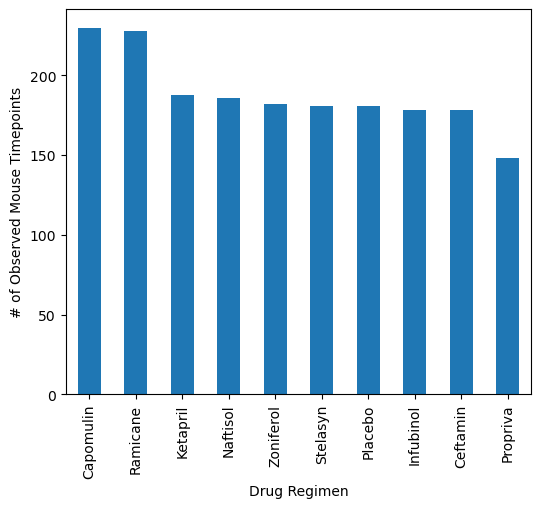

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_1 = drug_regimen.plot(kind='bar', figsize=(6,5))

#Set axis labels
bar_plot_1.set_xlabel('Drug Regimen')
bar_plot_1.set_ylabel('# of Observed Mouse Timepoints')

#Display the plot
plt.show()
plt.tight_layout()

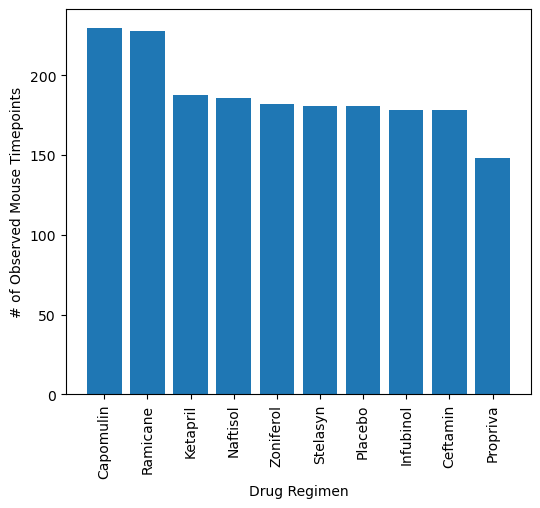

<Figure size 640x480 with 0 Axes>

In [205]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Set the index and x_axis
x = drug_regimen.index
y = drug_regimen.values

# Generate the bar plot
bar_plot_2 = plt.figure(figsize=(6, 5))
plt.bar(x, y)

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Rotate the xtick labels
plt.xticks(rotation=90)

# Display the plot
plt.show()
plt.tight_layout()

In [206]:
#Find the valuecounts for the 'Sex' column
gender_counts = clean_combined_df['Sex'].value_counts()
gender_counts

Male      958
Female    922
Name: Sex, dtype: int64

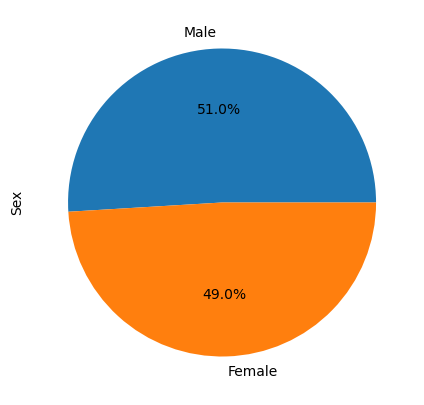

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set label
plt.ylabel('Sex')

# Display the plot
plt.show()

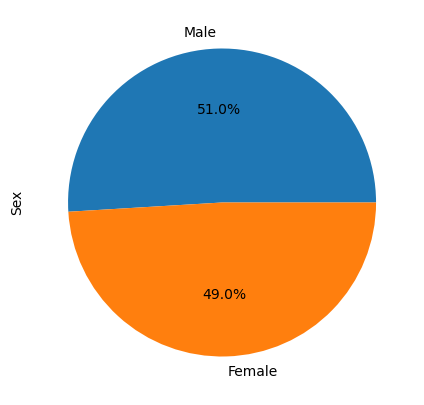

In [208]:
# Generate the pie plot with pyplot DataFrame.plot() method
pie_graph_1 = gender_counts.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')

#Set label
plt.ylabel('Sex')

#Display the Plot
plt.show()

## Quartiles, Outliers and Boxplots

In [209]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
filtered_df = clean_combined_df.groupby(["Mouse ID"])['Timepoint'].max()
filtered_df = filtered_df.reset_index()

# Merge group df with the original df to get the tumor volume at the last timepoint
final_tumor_volume_df = filtered_df.merge(clean_combined_df,on=['Mouse ID','Timepoint'],how="left")

# Display the final tumor volume DataFrame
print(final_tumor_volume_df)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [210]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine potential outliers for each treatment
for treatment in treatments:
    # Locate the rows which contain mice on the current treatment and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the subset of tumor volumes to the list for plotting
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and determine potential outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the potential outliers for the current treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


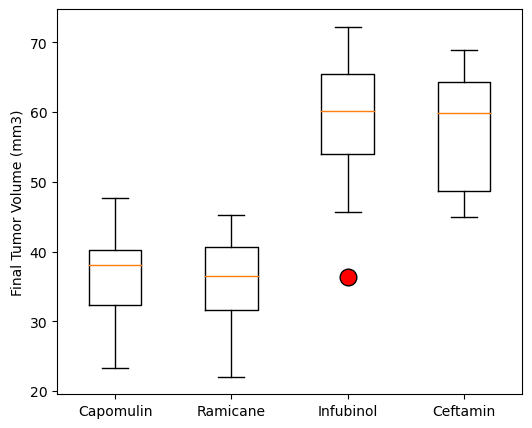

In [211]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Stylize the dot
dot = dict(markerfacecolor='red',markersize=12)

# Plot the box plot and set the labels
fig = plt.figure(figsize = (6, 5))
plt.boxplot(tumor_volume_data, labels = treatments, flierprops = dot)

#Set the axis label
plt.ylabel('Final Tumor Volume (mm3)')

#Display the plot
plt.show()

## Line and Scatter Plots

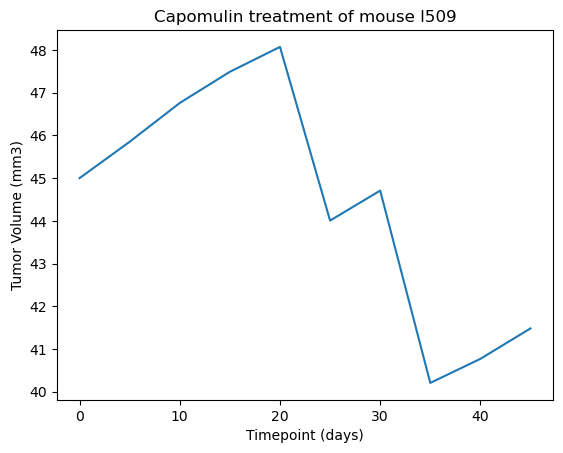

In [212]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == "Capomulin"]

# Select a single mouse treated with Capomulin
mouse_id = capomulin_df.loc[capomulin_df['Mouse ID']== 'l509']

# Generate the line plot
plt.plot(mouse_id['Timepoint'],mouse_id['Tumor Volume (mm3)'])

# Set plot title and axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Show the plot
plt.show()

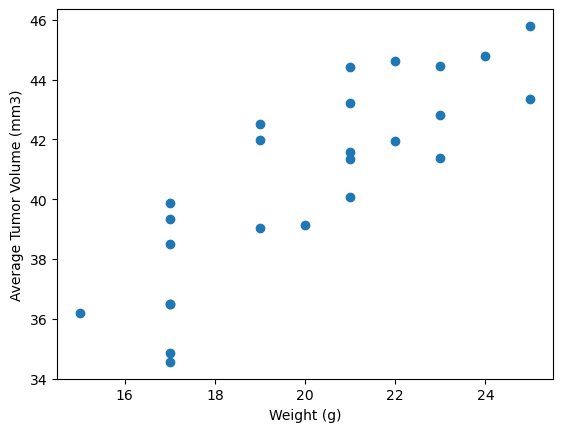

In [213]:
# Filter the dataframe for the Capomulin regimen
capomulin_df = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

plt.yticks([34, 36, 38, 40, 42, 44, 46])

# Set axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


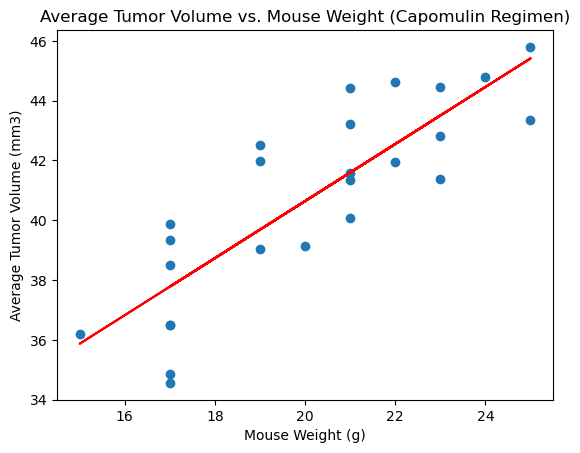

In [214]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the df for the Capomulin regimen
capomulin_df = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Plot the regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

# Set plot title and axis labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display correlation value
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Show the plot
plt.show()
